<a href="https://colab.research.google.com/github/bjornlestrud/DS-Unit-2-Applied-Modeling/blob/master/Bjorn_LS_DS_232_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Wrangle ML datasets

- [ ] Continue to clean and explore your data. 
- [ ] For the evaluation metric you chose, what score would you get just by guessing?
- [ ] Can you make a fast, first model that beats guessing?

**We recommend that you use your portfolio project dataset for all assignments this sprint.**

**But if you aren't ready yet, or you want more practice, then use the New York City property sales dataset for today's assignment.** Follow the instructions below, to just keep a subset for the Tribeca neighborhood, and remove outliers or dirty data. [Here's a video walkthrough](https://youtu.be/pPWFw8UtBVg?t=584) you can refer to if you get stuck or want hints!

- Data Source: [NYC OpenData: NYC Citywide Rolling Calendar Sales](https://data.cityofnewyork.us/dataset/NYC-Citywide-Rolling-Calendar-Sales/usep-8jbt)
- Glossary: [NYC Department of Finance: Rolling Sales Data](https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page)

In [0]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*



In [0]:
import pandas as pd

In [1]:
from google.colab import files
uploaded = files.upload()

Saving listings_3_.csv to listings_3_.csv


In [4]:
import io
df = pd.read_csv(io.BytesIO(uploaded['listings_3_.csv']))

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (43,61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
df = df.drop(['id','listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'neighborhood_overview', 'notes', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url'], axis=1)
df = df.drop(['xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'host_has_profile_pic', 'street', 'market', 'smart_location', 'country_code', 'country', 'extra_people', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'has_availability'], axis=1)
df = df.drop(['weekly_price', 'monthly_price', 'security_deposit', 'calendar_last_scraped', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'license', 'jurisdiction_names'], axis=1)
df = df.drop(['transit', 'host_since', 'host_location', 'host_acceptance_rate', 'host_is_superhost', 'host_listings_count', 'host_verifications', 'neighbourhood_group_cleansed', 'city', 'state', 'square_feet', 'calendar_updated', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'first_review', 'last_review', 'cancellation_policy', 'reviews_per_month'  ], axis=1)
df = df.drop(['is_location_exact'], axis=1)

In [0]:
df = df[df.price <= 1750]


In [6]:
df.columns

Index(['experiences_offered', 'host_response_time', 'host_response_rate',
       'host_neighbourhood', 'host_total_listings_count',
       'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed',
       'zipcode', 'latitude', 'longitude', 'is_location_exact',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'amenities', 'price', 'cleaning_fee',
       'guests_included', 'minimum_nights', 'maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'requires_license',
       'instant_bookable', 'is_business_travel_ready',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms'],
      dtype='object')

In [19]:
df.shape

(11190, 36)

In [22]:
df.sample(5)

,experiences_offered,host_response_time,host_response_rate,host_neighbourhood,host_total_listings_count,host_identity_verified,neighbourhood,neighbourhood_cleansed,zipcode,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,cleaning_fee,guests_included,minimum_nights,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,requires_license,instant_bookable,is_business_travel_ready,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
10756,none,within an hour,100%,Barton Hills,0.0,f,Barton Hills,78704,78704,30.24764,-97.78128,t,Apartment,Entire home/apt,4,1.0,2.0,2.0,Real Bed,"{TV,Wifi,""Air conditioning"",Pool,Kitchen,""Free...",300.0,NaN,1,1,4,1.0,4.0,f,t,f,f,f,1,1,0,0
9411,none,within an hour,100%,Downtown,14.0,f,Travis Heights,78704,78704,30.24721,-97.74216,t,House,Entire home/apt,8,2.0,3.0,4.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Free park...",200.0,200.0,1,1,1125,1.3,1125.0,f,t,f,f,f,13,13,0,0
8313,none,within a day,100%,Oak Hill,1.0,f,Oak Hill,78749,78749,30.23302,-97.83736,t,Apartment,Entire home/apt,5,1.0,1.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Pool,Kitchen,""Free...",85.0,15.0,2,1,8,1.0,8.0,f,f,f,f,f,1,1,0,0
5833,none,NaN,NaN,Downtown,7.0,f,Downtown,78701,78701,30.27062,-97.74762,t,Resort,Private room,4,1.0,0.0,2.0,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Pool,Ki...",145.0,0.0,1,2,7,2.0,7.0,f,f,f,f,f,1,0,1,0
3949,none,NaN,NaN,South First,5.0,t,Bouldin Creek,78704,78704,30.25022,-97.75407,t,House,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",72.0,25.0,1,7,120,7.0,120.0,f,f,f,f,t,5,0,5,0


In [8]:
df.dtypes


experiences_offered                              object
host_response_time                               object
host_response_rate                               object
host_neighbourhood                               object
host_total_listings_count                       float64
host_identity_verified                           object
neighbourhood                                    object
neighbourhood_cleansed                            int64
zipcode                                          object
latitude                                        float64
longitude                                       float64
is_location_exact                                object
property_type                                    object
room_type                                        object
accommodates                                      int64
bathrooms                                       float64
bedrooms                                        float64
beds                                            

In [46]:
  df.sample()

,experiences_offered,host_response_time,host_response_rate,host_neighbourhood,host_total_listings_count,host_identity_verified,neighbourhood,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,cleaning_fee,guests_included,minimum_nights,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,requires_license,instant_bookable,is_business_travel_ready,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
653,none,NaN,NaN,Holly,1.0,1.0,East Downtown,78702,78702,30.25104,-97.72704,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",300.0,100.0,4,7,1125,7.0,1125.0,0.0,0.0,0.0,1.0,1.0,1,1,0,0


In [44]:
# can pipelines interpret booleans? if not, the f and t need to be changed to 0 and 1 and column types for those features changed to int

#host_identity_verified, requires_license, instant_bookable, is_business_travel_ready, require_guest_profile_picture, require_guest_phone_verification

df[["host_identity_verified", "requires_license", "instant_bookable", "is_business_travel_ready", "require_guest_profile_picture", "require_guest_phone_verification" ]].replace({"t": "1", "f": "0"}, inplace=True)


TypeError: ignored

In [0]:
df = df.replace(1.0, 1)
df = df.replace(0.0, 0)

In [49]:
# change column type of above to integer

df[["host_identity_verified", "requires_license", "instant_bookable", "is_business_travel_ready", "require_guest_profile_picture", "require_guest_phone_verification" ]] = df[["host_identity_verified", "requires_license", "instant_bookable", "is_business_travel_ready", "require_guest_profile_picture", "require_guest_phone_verification" ]].astype(float).astype(int)



ValueError: ignored

In [42]:
df.dtypes

experiences_offered                              object
host_response_time                               object
host_response_rate                               object
host_neighbourhood                               object
host_total_listings_count                       float64
host_identity_verified                          float64
neighbourhood                                    object
neighbourhood_cleansed                            int64
zipcode                                          object
latitude                                        float64
longitude                                       float64
property_type                                    object
room_type                                        object
accommodates                                      int64
bathrooms                                       float64
bedrooms                                        float64
beds                                            float64
bed_type                                        

In [43]:
df.sample()


,experiences_offered,host_response_time,host_response_rate,host_neighbourhood,host_total_listings_count,host_identity_verified,neighbourhood,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,cleaning_fee,guests_included,minimum_nights,maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,requires_license,instant_bookable,is_business_travel_ready,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
3429,none,NaN,NaN,Downtown,1.0,1.0,Downtown,78701,78701,30.27894,-97.74212,Apartment,Entire home/apt,5,1.0,1.0,2.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Pool,Kitc...",375.0,NaN,1,2,5,2.0,5.0,0.0,1.0,0.0,0.0,0.0,1,1,0,0


In [0]:
df['price'] = df['price'].str.replace('$', '')

df['price'] = df['price'].str.replace(',', '')

df['price'] = df['price'].astype(float)

In [11]:
df['price'].describe()

count    11250.000000
mean       428.851556
std       1295.733573
min          0.000000
25%         80.000000
50%        140.000000
75%        300.000000
max      17999.000000
Name: price, dtype: float64

In [12]:
df['price'].isnull().sum()

0

In [0]:
y = df['price']

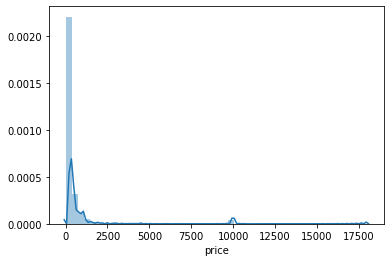

In [14]:
import seaborn as sns
sns.distplot(y);

In [0]:
# how many values are above 12k

import numpy as np
df = df[(df['price'] >= np.percentile(df['price'], 0.5)) & 
        (df['price'] <= np.percentile(df['price'], 99.5)) & 
        (df['latitude'] >= np.percentile(df['latitude'], 0.05)) & 
        (df['latitude'] < np.percentile(df['latitude'], 99.95)) &
        (df['longitude'] >= np.percentile(df['longitude'], 0.05)) & 
        (df['longitude'] <= np.percentile(df['longitude'], 99.95))]

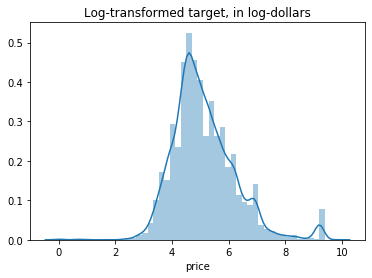

In [16]:
import matplotlib.pyplot as plt
y_log = np.log1p(y)
sns.distplot(y_log)
plt.title('Log-transformed target, in log-dollars');

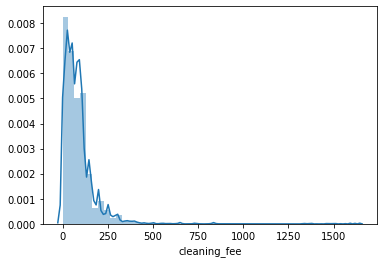

In [18]:
df['cleaning_fee'] = df['cleaning_fee'].str.replace(',', '')
df['cleaning_fee'] = df['cleaning_fee'].astype(float)

w = df['cleaning_fee']
sns.distplot(w)

In [82]:
target = 'price'
features = df.columns

from sklearn.model_selection import train_test_split
train, test = train_test_split(df, train_size=0.80, test_size=0.20, random_state=42)

train.shape, test.shape

((8684, 35), (2172, 35))

In [61]:
! pip install category_encoders

     |████████████████████████████████| 102kB 2.8MB/s 


In [0]:
# let's encode a pipeline
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OrdinalEncoder
import category_encoders as ce


features = train.columns.drop(target)
X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42)
)



In [85]:
pipeline.fit(X_train, y_train)
print('Test Accuracy:', pipeline.score(X_test, y_test))

Test Accuracy: 0.5224390768849454


In [63]:
k = 3
scores = cross_val_score(pipeline, X_train, y_train, cv=k, 
                         scoring='neg_mean_absolute_error')
print(f'MAE for {k} folds:', -scores)

266.5008065236819

In [0]:
# find the parameters of my best fold which had MAE of 180

In [86]:
from sklearn.metrics import mean_absolute_error

y_pred = pipeline.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Test MAE: ${mae:,.0f}')

Test MAE: $117
